In [1]:
# pca es algoritmo de reduccion de la dimensionalidad
# pca solamente selecciona las variables mas relevantes de nuestro dataset
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA #--> en este modulo encontramos todo lo relacionado con la dimensionalidad
from sklearn.decomposition import IncrementalPCA
    
from sklearn.linear_model import LogisticRegression # --> utilizamos regresion logistica solamente para clasificar

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

    

In [2]:
dt_heart = pd.read_csv('heart.csv') #--> el data set esta almacenado en la variable dt_heart

In [3]:
dt_heart.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [4]:
dt_features = dt_heart.drop(['target',],axis=1)#-->creo una variable con los datos, aqui con la funcion drop estoy eliminando la columna target 
# la columna target es la que queremos clasificar

In [5]:
dt_features.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
dt_target = dt_heart['target']#-->aqui declaro un dataset exclusivo con los datos de la columna target de dt_heart
dt_target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:
# para PCA siempre necesitamos normalizar nuestros datos con alguna funcion es decir dividir los datos 
# y que la suma de esa division nos de el 100% del ejemplo 50% + 40% + 10% Acontinuacion voy a normalizar los datos

In [11]:
dt_features = StandardScaler().fit_transform(dt_features)#carga los datos ajusta el modelo y aplica la trasformacion de una vez
dt_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [15]:
# ahora parto el conjunto de entrenamiento utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=0)
# test_size=0.3 --> aqui indico que para los test se van a utilizar el 30% de los datoa
# random_state=42 --> es para que en caso de hacer otro entrenamiento con los mismos datos me de el mismo resultado por que por lo general lo hace aleatoriamente

In [16]:
print(X_train.shape)
print(y_train.shape)


(717, 13)
(717,)


In [17]:
# ahora voy a definir el pca

In [18]:
# configuro pca para que reciba tres componentes del dataset y se ajuste a los datos de entrenamiento
pca = PCA(n_components=3) #--> aqui digo que el numero de componentes que espero son 3 o 3 features
pca.fit(X_train) #--> aplico la funcion fit a los datos de entrenamiento en este caso son X_train


PCA(n_components=3)

In [19]:
# si tenemos un dataset demasiado exigente o un equipo de bajos recursos usamos ipca
# ahora vamos hacer lo mismo pero con ipca para hacer la comparacion de pca

In [20]:
ipca = IncrementalPCA(n_components=3, batch_size=10)#ipca no manda entrenar los datos al mismo tiempo crea pequeños bloques llamdos batch
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

In [21]:
# ahora voy a ver la varianza de los componentes que se estan ejecutando
# utilizo matplotlib para graficar


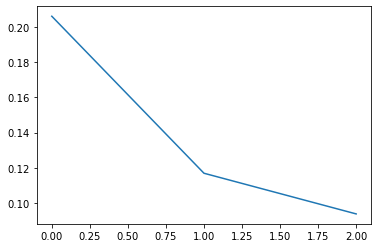

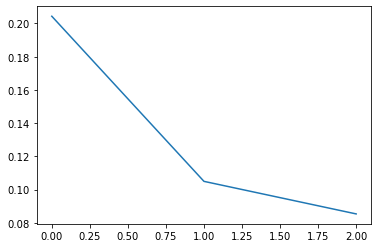

In [22]:
# grafico pca
# defino el eje x
plt.plot(range(len(pca.explained_variance_)),#-->aqui le digo que me genere los numeros de 0 a n_components que declare al pca
# defino el eje y 
pca.explained_variance_ratio_)#--> aqui se grafica el valor de la importancia de cada uno de los componentes para identificar cuales son los importantes para nuestro modelo
plt.show()


#grafico ipca
# defino el eje x
plt.plot(range(len(ipca.explained_variance_)),#-->aqui le digo que me genere los numeros de 0 a n_components que declare al pca
# defino el eje y 
ipca.explained_variance_ratio_)#--> aqui se grafica el valor de la importancia de cada uno de los componentes para identificar cuales son los importantes para nuestro modelo
plt.show()

In [23]:
# en la grafica se puede identificar que la primer componenete nos aporta mas del 20% de la informacion,
# la seguda poco menos del 12% de la informacion y la tercera el 1% de la informacion


In [24]:
#AHORA A IMPLEMENTAR EL ALGORITMO DE REGRESION LOGISTICA

In [25]:
logistic = LogisticRegression(solver='lbfgs')
# voy a aplicar PCA a nuestro conjunto de entrenamiento y a nuestro conjunto de pruebas
# se aplica pca a los ejes x
dt_train = pca.transform(X_train)
dt_tests = pca.transform(X_test)

logistic.fit(dt_train, y_train)
print('score pca: ',logistic.score(dt_tests, y_test))#--> aqui calculo el porcentaje de prediccion entre dt_test y y_test

# voy a aplicar IPCA a nuestro conjunto de entrenamiento y a nuestro conjunto de pruebas 
dt_train = ipca.transform(X_train)
dt_tests = ipca.transform(X_test)

logistic.fit(dt_train, y_train)
print('score ipca: ',logistic.score(dt_tests, y_test))

score pca:  0.8538961038961039
score ipca:  0.8311688311688312
